In [2]:
# Week 1: Dataset Exploration
import pandas as pd

# Load main dataset
df = pd.read_csv("data/city_day.csv")

# Preview top rows
print("📊 First 5 rows:")
display(df.head())

# Basic info
print("\n📘 Dataset Info:")
df.info()



📊 First 5 rows:


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN



📘 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [3]:
# Summary statistics
print("\n📈 Statistical Summary:")
display(df.describe())

# Missing values
print("\n❌ Missing Values:")
display(df.isnull().sum())

# Duplicate check
duplicates = df.duplicated().sum()
print(f"\n🧾 Number of duplicate rows: {duplicates}")



📈 Statistical Summary:


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000



❌ Missing Values:


City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


🧾 Number of duplicate rows: 0


In [1]:
# --- Phase 2: Data Preprocessing & Model Training ---

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [2]:
# 1️⃣ Load Dataset
df = pd.read_csv("data/city_day.csv")
print("✅ Data loaded successfully!")

✅ Data loaded successfully!


In [3]:
# 2️⃣ Clean Data
df = df.drop(columns=['City', 'Date', 'AQI_Bucket'], errors='ignore')
df = df.fillna(df.median(numeric_only=True))
print("✅ Missing values handled.")

✅ Missing values handled.


In [4]:
# 3️⃣ Define Features & Target
X = df.drop(columns=['AQI'], errors='ignore')
y = df['AQI']
mask = ~y.isna()
X, y = X[mask], y[mask]


In [5]:
# 4️⃣ Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 6️⃣ Train Models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
lr.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [7]:
# 7️⃣ Evaluate Models
def evaluate(model, X_t, y_t):
    preds = model.predict(X_t)
    mae = mean_absolute_error(y_t, preds)
    mse = mean_squared_error(y_t, preds)
    r2 = r2_score(y_t, preds)
    return mae, mse, r2

lr_mae, lr_mse, lr_r2 = evaluate(lr, X_test_scaled, y_test)
rf_mae, rf_mse, rf_r2 = evaluate(rf, X_test, y_test)

print("\n📊 MODEL PERFORMANCE")
print(f"Linear Regression: MAE={lr_mae:.2f}, MSE={lr_mse:.2f}, R2={lr_r2:.3f}")
print(f"Random Forest:     MAE={rf_mae:.2f}, MSE={rf_mse:.2f}, R2={rf_r2:.3f}")


📊 MODEL PERFORMANCE
Linear Regression: MAE=29.91, MSE=2965.68, R2=0.807
Random Forest:     MAE=19.96, MSE=1842.74, R2=0.880


In [8]:
# 8️⃣ Save the Best Model
best_model = rf if rf_r2 > lr_r2 else lr
joblib.dump(best_model, "air_quality_model.pkl")
print(f"\n🏆 Best model saved as air_quality_model.pkl ({type(best_model).__name__})")


🏆 Best model saved as air_quality_model.pkl (RandomForestRegressor)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
BEST PARAMETERS: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 80}
MAE: 19.94379816832689
MSE: 1824.8352949689195
R2: 0.8814615793877919


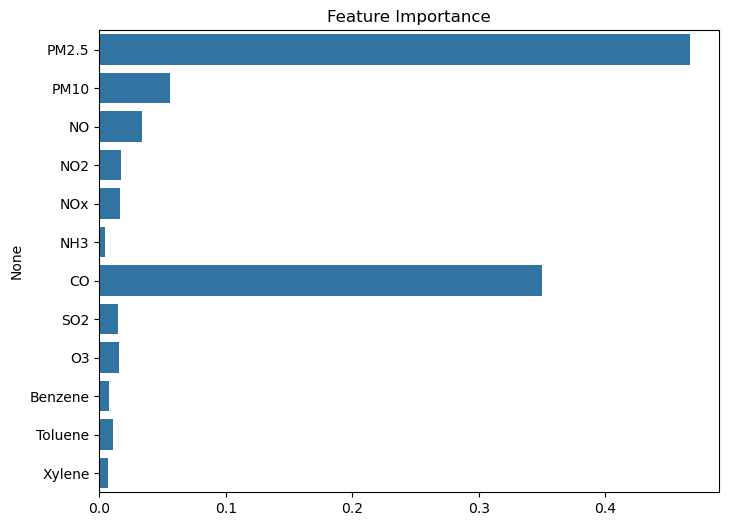

Saved model as final_small_model.pkl


In [1]:
# --- WEEK 3: Model Evaluation & Optimization ---

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data/city_day.csv")
df = df.drop(columns=['City','Date','AQI_Bucket'], errors='ignore')
df = df.fillna(df.median(numeric_only=True))

X = df.drop(columns=['AQI'], errors='ignore')
y = df['AQI']
mask = ~y.isna()
X, y = X[mask], y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
params = {
    'n_estimators': [30, 50, 80],    # small values to avoid huge model file
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, params, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_

# Evaluate model
y_pred = best_rf.predict(X_test)

print("BEST PARAMETERS:", grid.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

# Feature importance
importances = best_rf.feature_importances_
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance")
plt.show()

# Save small model (< 20MB)
import joblib
joblib.dump(best_rf, "final_small_model.pkl")
print("Saved model as final_small_model.pkl")
